# Towards binary classification
### Understand important features using a decision tree

Reading:
- scikit-learn - https://scikit-learn.org/stable/
- Decision Trees - https://scikit-learn.org/stable/modules/tree.html
- Count Vectorizer - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### To run this notebook you need test_sentiment.zip (in Learning Central)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
CURRENT_PATH = ""

In [3]:
import os
from collections import defaultdict
# read each file, add that file to a list of files belonging to the same class
data_path = CURRENT_PATH
# get all files contained in the directory
list_of_files = [inf for inf in os.listdir(data_path) if inf == 'pos' or inf == 'neg']
print(list_of_files)
# data is a dictionary where each key is a string, and each value is a list
# Convenient because we do not have to check if the key exists or not, it will always work
data=defaultdict(list)
for one_file in list_of_files:
    #os.path.join joins a path to a folder and a file into one manageable path
    # in windows, something like os.path.join(c:\Users\luis,'file.txt') >>> 'c:\\Users\\luis\\file.txt'
    with open(os.path.join(data_path,one_file),'r') as f:
        for line in f:
            # each line in each file contains one single document
            data[one_file].append(line)
for label in data:
    print('For label ',label,' we have ',len(data[label]),' documents')

['neg', 'pos']
For label  neg  we have  54380  documents
For label  pos  we have  65403  documents


In [0]:
# create label to id dictionary
label2id = {'pos':1,'neg':0}

In [5]:
print(data['neg'][0])

rarely does a film so graceless and devoid of merit 



In [6]:
print(data['pos'][0])

` blue crush 



In [7]:
len(data['pos']),len(data['neg'])

(65403, 54380)

In [0]:
# we will also store all documents in a single array to use the following bit of code
all_documents = []
# we will do the same for labels (for later)
all_labels = []
# for each label in the dictionary (key)
for label in data:
    # for each document in the list of documents pertaining to that label
    for document in data[label]:
        # add that document to the array with all documents
        all_documents.append(document)
        all_labels.append(label2id[label])

In [9]:
len(all_documents),type(all_documents)

(119783, list)

In [10]:
# Here we start using scikit-learn!
# the CountVectorizer can be used to transform each document into a 'bag-of-words' representation
# https://en.wikipedia.org/wiki/Bag-of-words_model
# Each document is then represented as *presence* or *absence* of the words in our 'bag'
from sklearn.feature_extraction.text import CountVectorizer
# We don't need to use a dictionary for counting word frequency and selecting the important ones.
# sklearn has this (and more advanced) built-in functions!
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(all_documents)
print('These are our "features":',', '.join(vectorizer.get_feature_names()))
print('A value of zero means that word is not in the document, one if yes')
print('Each value in a document array corresponds by position with the above features')
print(X.toarray())  
#print('E.g.: The last document contains the words "action", "fantastic" and "loved"')

These are our "features": action, audience, bad, best, better, big, cast, character, characters, comedy, director, does, drama, feel, film, films, fun, funny, good, great, heart, humor, interesting, just, life, like, little, long, look, love, make, makes, movie, movies, new, old, people, performance, performances, plot, real, really, self, sense, story, time, way, work, world, year
A value of zero means that word is not in the document, one if yes
Each value in a document array corresponds by position with the above features
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [0]:
# Fit a decision tree (classifier based on a set of if-else questions to eventually make an informed decision)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
# The fit method takes two equally long arrays, one with data points (X), and one with labels (all_labels).
# By convention you will see the labels referred to as 'y', and data as 'X'.
clf = clf.fit(X, all_labels)

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin: C:\\Program Files\\Python36\\Lib\\site-packages\\graphviz', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '19', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.

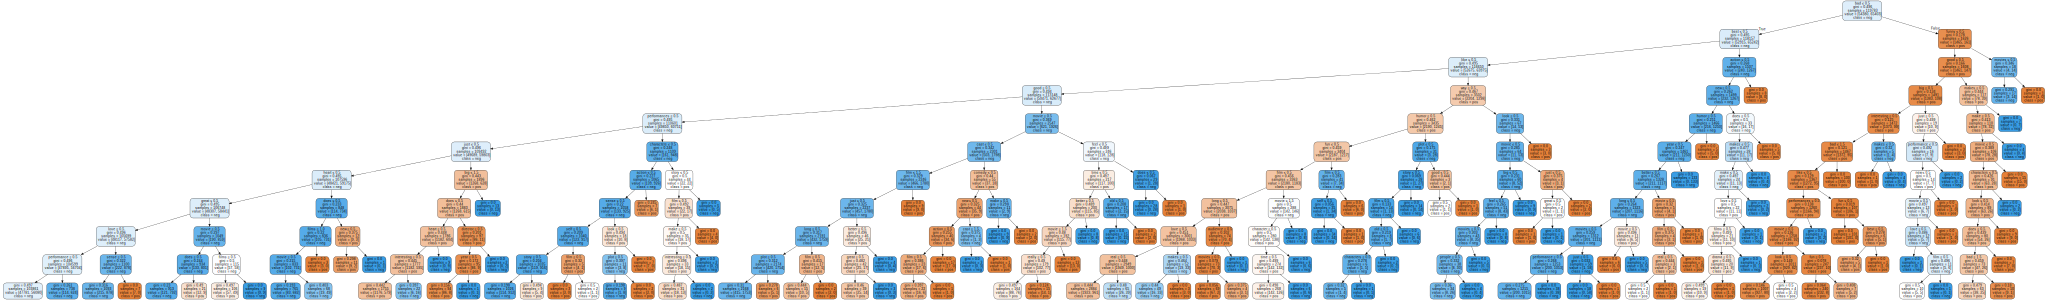

In [12]:
# We will *not* use the classifier to make predictions yet, but rather to understand the data we have.
# Specifically, which are the most discriminative features, and what are they useful to discriminate?
# In this example, which are the words whose presence tell us most about positive and negative documents?

# We import the graphviz library simply for visualizing the tree
import graphviz
os.environ["PATH"] += os.pathsep + ' C:\\Program Files\\Python36\\Lib\\site-packages\\graphviz'
print(os.environ)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vectorizer.get_feature_names(),  
                                class_names=list(label2id.keys()),  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [13]:
type(all_labels),len(all_labels)

(list, 119783)

In [15]:
all_labels[-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,all_labels)

In [20]:
# retrain but only with test data
clf = tree.DecisionTreeClassifier(max_depth=1000)
clf = clf.fit(X_train, y_train)
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.27      0.67      0.38      5343
           1       0.89      0.59      0.71     24603

    accuracy                           0.61     29946
   macro avg       0.58      0.63      0.55     29946
weighted avg       0.78      0.61      0.65     29946



In [30]:
type(X)

scipy.sparse.csr.csr_matrix

In [29]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
  clf = tree.DecisionTreeClassifier(max_depth=1000)
  clf = clf.fit(X_train, y_train)
  print(classification_report(clf.predict(X_test),y_test))
  print('-----------------')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.06      1.00      0.11      2290
           1       0.00      0.00      0.00     37638

    accuracy                           0.06     39928
   macro avg       0.03      0.50      0.05     39928
weighted avg       0.00      0.06      0.01     39928

-----------------
              precision    recall  f1-score   support

           0       0.88      0.41      0.56     31111
           1       0.28      0.80      0.41      8817

    accuracy                           0.49     39928
   macro avg       0.58      0.60      0.48     39928
weighted avg       0.74      0.49      0.52     39928

-----------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     33480
           1       0.16      1.00      0.28      6447

    accuracy                           0.16     39927
   macro avg       0.08      0.50      0.14     39927
weighted avg       0.03      0.16     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
